In [1]:
import pandas as pd

file = 'colheitas_10-05-2021.csv'

df = pd.read_csv(file, sep=';')

mask_approved_collection = (df['colheita_fase'] == 'E') & (df['colheita_estado'] == 'O')

dropped_records = df[~mask_approved_collection].copy()

df = df[mask_approved_collection]

C:\Users\gonca\AppData\Local\Temp\ipykernel_21552\2317723722.py:5: DtypeWarning: Columns (37,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=';')


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

concelhos_metropolitana_lisboa = ['AMADORA', 'OEIRAS', 'LISBOA', 'LOURES', 'ODIVELAS', 'SINTRA', 'CASCAIS', 'MAFRA', 'ALMADA', 'SEIXAL', 'BARREIRO', 'MOITA', 'PALMELA', 'SESIMBRA', 'SETUBAL', 'MONTIJO', 'ALCOCHETE', 'VILA FRANCA DE XIRA']

distrito = df[df['brigada_distrito'] == 'LISBOA']
concelho = df[df['brigada_concelho'] == 'LISBOA']
sl_brigada = df[df['brigada_centro_sangue_transplante'] == 'SL']
concelho_metropolitana_lisboa = df[df['brigada_concelho'].isin(concelhos_metropolitana_lisboa)]


In [ ]:
df['colheita_data'] = pd.to_datetime(df['colheita_data'])

reference_date = pd.Timestamp('2019-01-01')

# Subtract 10 years from the reference date
ten_years_before_2020 = reference_date - pd.DateOffset(years=10)

# Update the mask to filter records within the last 10 years before 2020
combined_mask = (df['colheita_data'] >= ten_years_before_2020) & (df['colheita_data'] < reference_date)

# Filter the DataFrame to include only records within the last 10 years
df_last_10_years = df[combined_mask]

In [ ]:
grouped_by_day = df_last_10_years.groupby(pd.Grouper(key='colheita_data', freq='D')).size().reset_index(name='count')
grouped_by_month = df_last_10_years.groupby(pd.Grouper(key='colheita_data', freq='M')).size().reset_index(name='count')
grouped_by_week = df_last_10_years.groupby(pd.Grouper(key='colheita_data', freq='W')).size().reset_index(name='count')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
file = 'colheitas_10-05-2021.csv'
df = pd.read_csv(file, sep=';')


C:\Users\gonca\AppData\Local\Temp\ipykernel_17320\2508856264.py:6: DtypeWarning: Columns (37,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep=';')


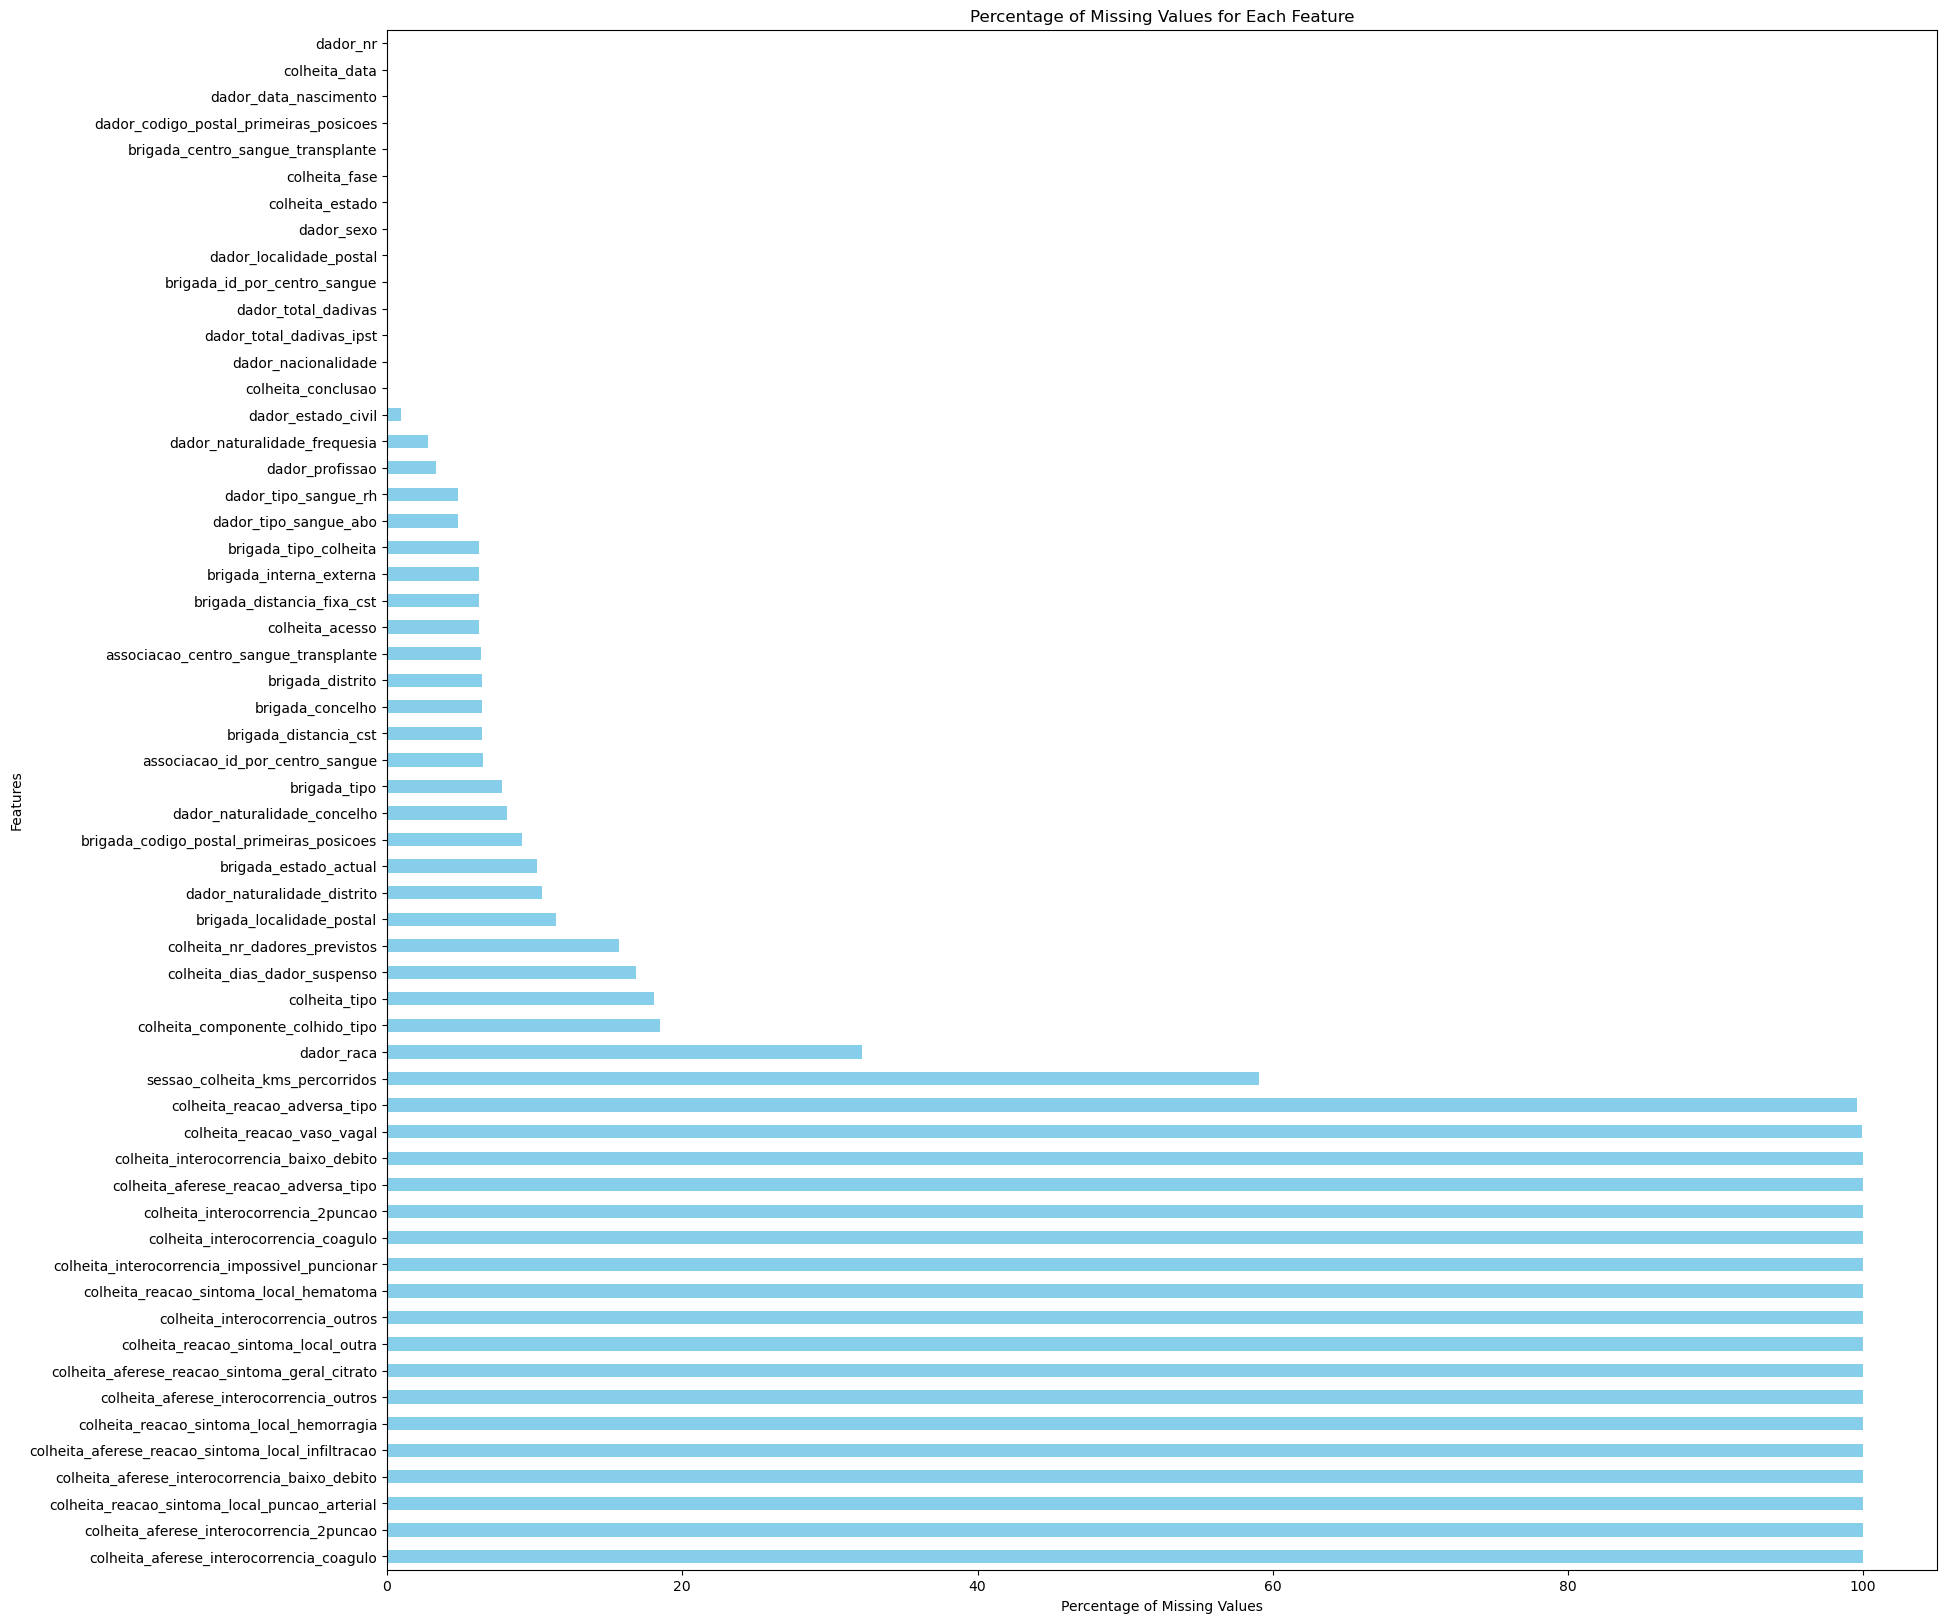

In [6]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)

# Plot the transposed histogram
plt.figure(figsize=(20, 20))
missing_percentage.plot(kind='barh', color='skyblue')  # Use barh for horizontal bars
plt.title('Percentage of Missing Values for Each Feature')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.show()

In [4]:
for col in df.columns:
    print(col)

dador_nr
dador_data_nascimento
dador_sexo
dador_raca
dador_estado_civil
dador_profissao
dador_nacionalidade
dador_naturalidade_distrito
dador_naturalidade_concelho
dador_naturalidade_frequesia
dador_codigo_postal_primeiras_posicoes
dador_localidade_postal
dador_tipo_sangue_abo
dador_tipo_sangue_rh
dador_total_dadivas
dador_total_dadivas_ipst
associacao_centro_sangue_transplante
associacao_id_por_centro_sangue
brigada_centro_sangue_transplante
brigada_id_por_centro_sangue
brigada_tipo
brigada_tipo_colheita
brigada_interna_externa
brigada_estado_actual
brigada_codigo_postal_primeiras_posicoes
brigada_distrito
brigada_concelho
brigada_localidade_postal
brigada_distancia_fixa_cst
brigada_distancia_cst
sessao_colheita_kms_percorridos
colheita_nr_dadores_previstos
colheita_acesso
colheita_data
colheita_tipo
colheita_componente_colhido_tipo
colheita_reacao_adversa_tipo
colheita_aferese_reacao_adversa_tipo
colheita_reacao_vaso_vagal
colheita_reacao_sintoma_local_hematoma
colheita_reacao_sintom

# Histograma de distrito do dador

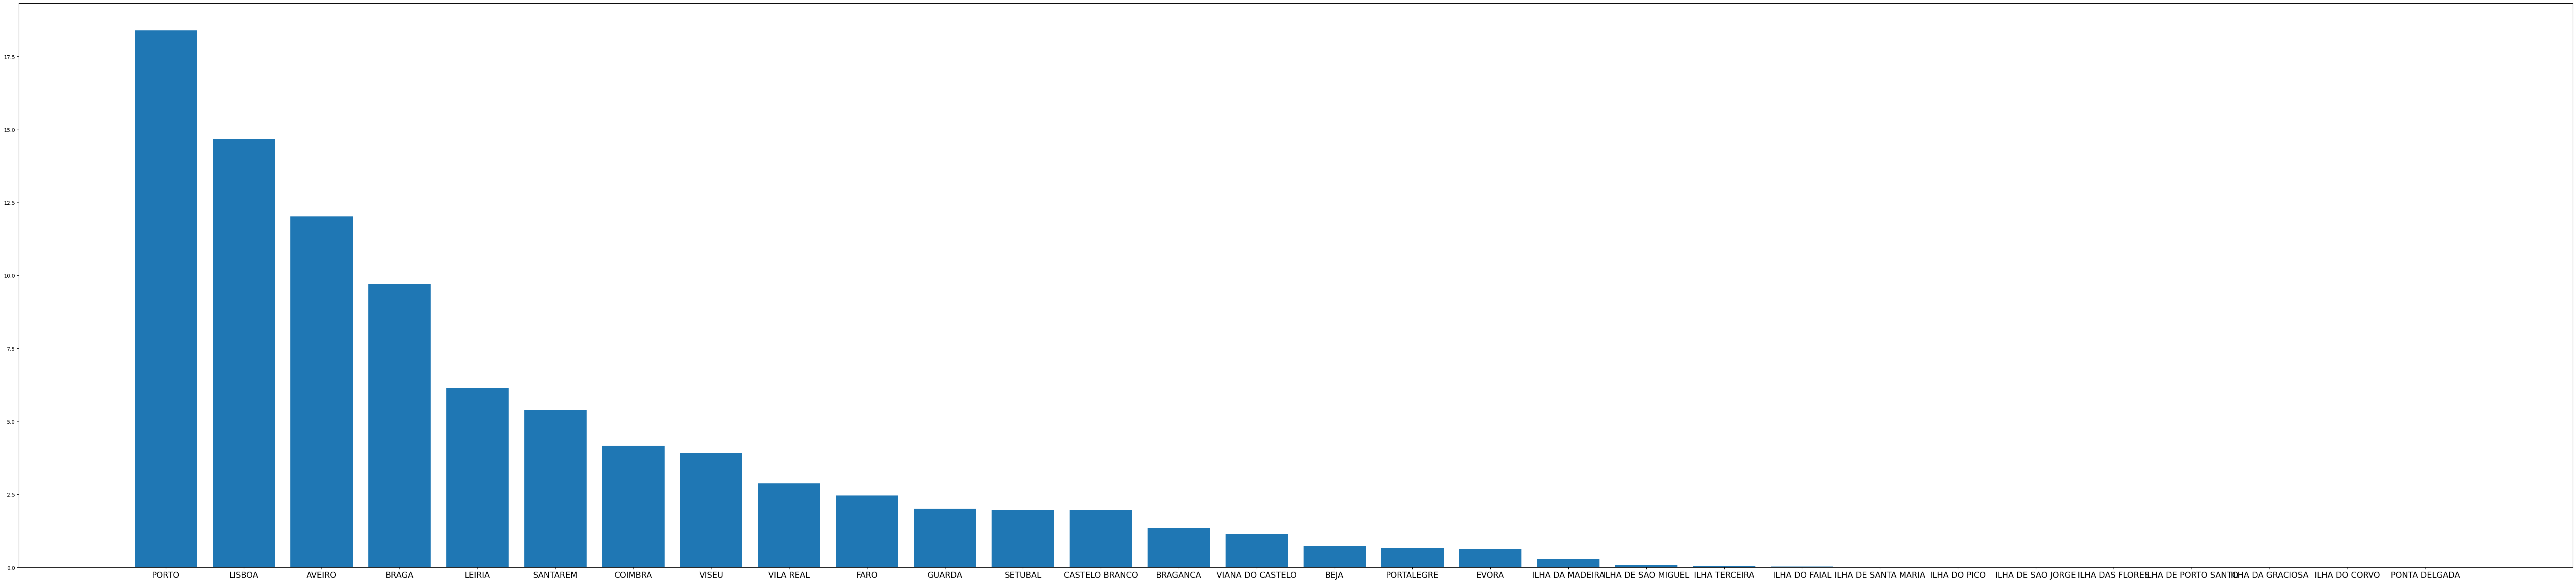

In [2]:
import matplotlib.pyplot as plt

value_counts = df['dador_naturalidade_distrito'].value_counts()
percentage_frequencies = (value_counts / len(df)) * 100
plt.figure(figsize=(90, 20))
plt.bar(percentage_frequencies.index, percentage_frequencies.values)
plt.xticks(fontsize=16)
plt.show()

# Histograma de género do dador

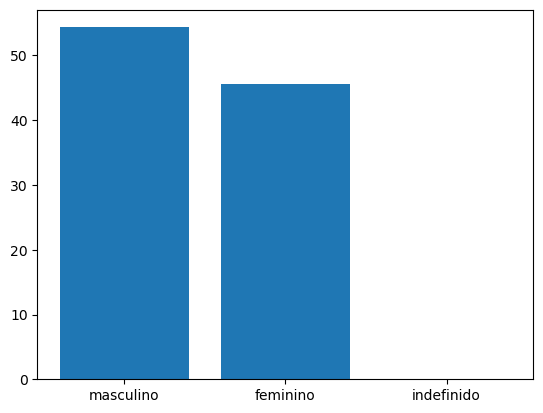

In [8]:
import matplotlib.pyplot as plt

value_counts = df['dador_sexo'].value_counts()
percentage_frequencies = (value_counts / len(df)) * 100
plt.bar(percentage_frequencies.index, percentage_frequencies.values)
plt.show()

# Histograma de ano de nascimento

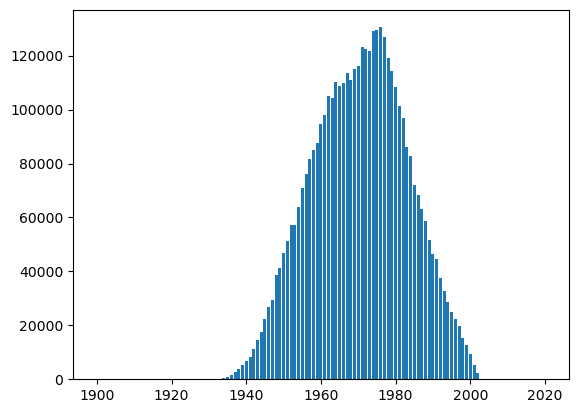

In [9]:
temp = pd.to_datetime(df['dador_data_nascimento'])
df['year'] = temp.dt.year
year_counts = df['year'].value_counts()
plt.bar(year_counts.index, year_counts.values)
plt.show()

# Histograma colheitas tipo de sangue

Total Records: 4305472
Valid Records: 4292219
Ignored Records: 13253
PERCENTAGEM: 0.30781758655032476


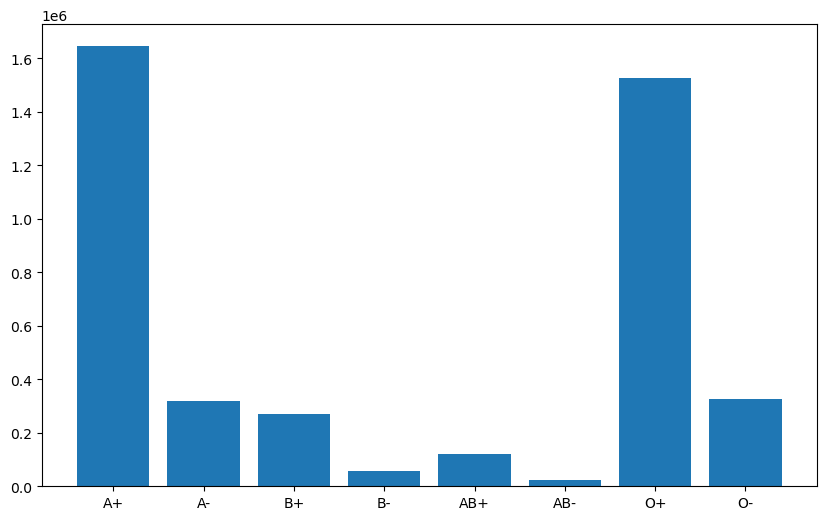

In [10]:
valid_blood_combinations = [('A', '+'),('A', '-'),('B', '+'), ('B', '-'), ('AB', '+'), ('AB', '-'), ('O', '+'), ('O', '-')]
frequencies = []

for combo in valid_blood_combinations:
    frequency = ((df['dador_tipo_sangue_abo'] == combo[0]) & (df['dador_tipo_sangue_rh'] == combo[1])).sum()
    frequencies.append(frequency)

total_valid = sum(frequencies)
total_records = len(df)
ignored_records = total_records - total_valid

print("Total Records:", total_records)
print("Valid Records:", total_valid)
print("Ignored Records:", ignored_records)
print("PERCENTAGEM:", (ignored_records/total_records)*100)

plt.figure(figsize=(10, 6))
plt.bar(range(len(valid_blood_combinations)), frequencies, tick_label=[f'{a}{b}' for a, b in valid_blood_combinations])
plt.show()


# Histograma Dádivas IPST vs Total dádivas

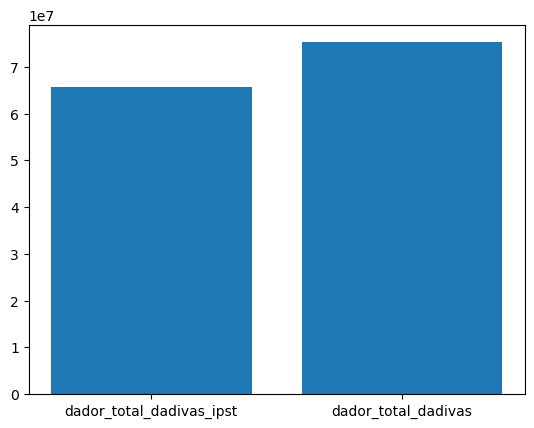

Percentage of ipst donations compared to total donations: 87.14222159896579


In [11]:
columns = ['dador_total_dadivas_ipst', 'dador_total_dadivas']
x = [df[columns[0]].sum(), df[columns[1]].sum()]

plt.bar(columns, x)
plt.show()

print(f"Percentage of ipst donations compared to total donations: {x[0]/x[1]*100}")

# Mean Value of ipst donations percentages compared to total donations 

##### Para cada pessoa que tenha doacoes, calcula -se a percentagem de dadivas ao ipst comparado com as dadivas totais. Finalmente faz se a media destes valores

In [12]:
import numpy as np

def calculate_ratio(row):
        if not pd.isna(row['dador_total_dadivas_ipst']) and not pd.isna(row['dador_total_dadivas']) and not row['dador_total_dadivas'] == 0:
            return (row['dador_total_dadivas_ipst'] / row['dador_total_dadivas']) * 100
        
            
aux = df.apply(calculate_ratio, axis=1).tolist()

print(np.nanmean(aux))

91.23647757347423


# Representação das colheitas atraves do tempo

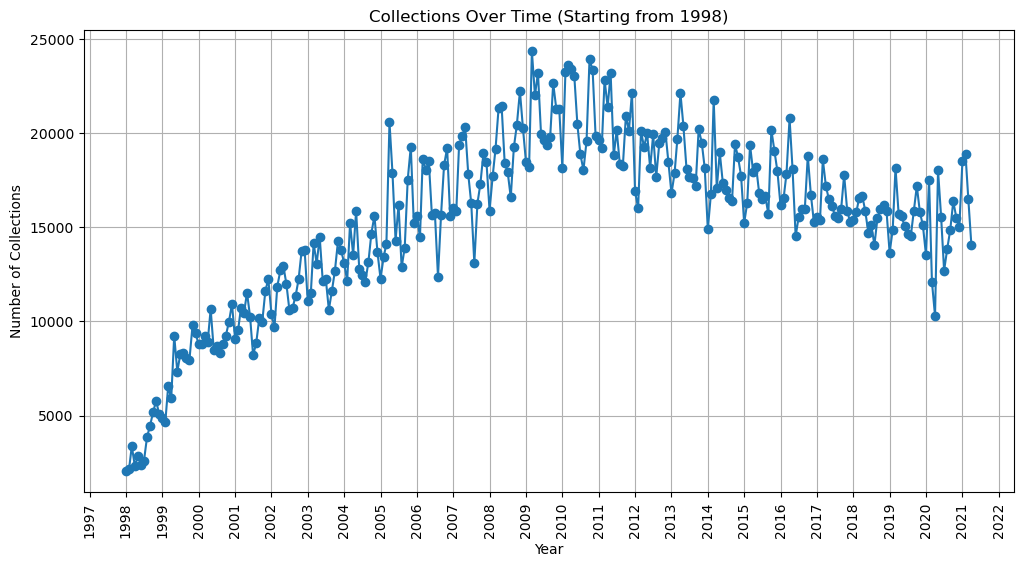

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['colheita_data'] = pd.to_datetime(df['colheita_data'])

df_filtered = df[df['colheita_data'].dt.year >= 1998]

monthly_colheitas = df_filtered.groupby(df_filtered['colheita_data'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_colheitas.index.to_timestamp(), monthly_colheitas.values, marker='o', linestyle='-')
plt.title("Collections Over Time (Starting from 1998)")
plt.xlabel("Year")
plt.ylabel("Number of Collections")
plt.grid(True)

ax = plt.gca()
years = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation=90)

plt.show()


# Colheitas por localidade


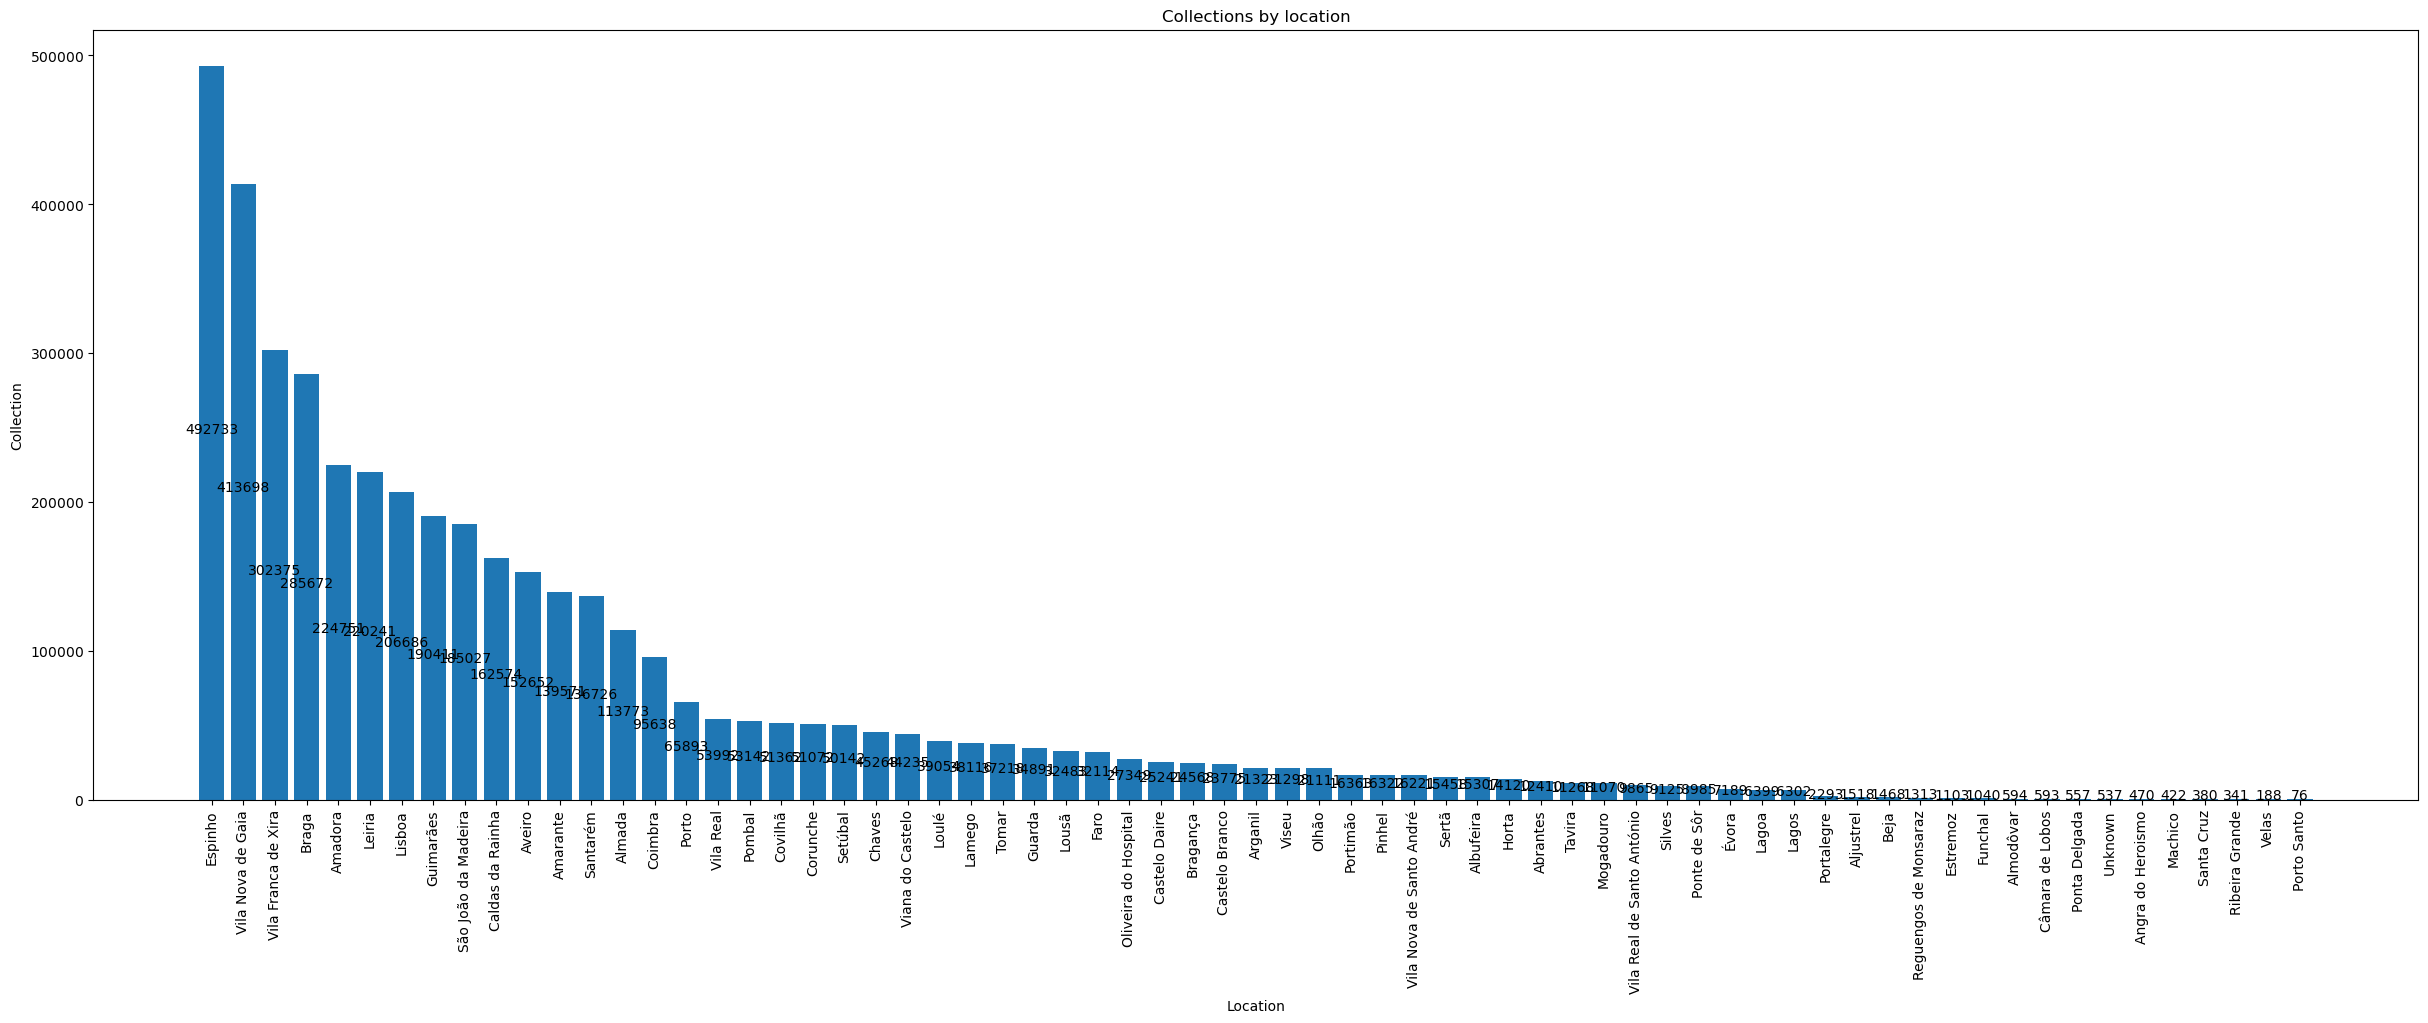

In [3]:
from matplotlib.ticker import ScalarFormatter

def translate_postal_code(value):
    if value == 10:
        return "Lisboa"
    elif value == 20:
        return "Santarém"
    elif value == 21:
        return "Corunche"
    elif value == 22:
        return "Abrantes"
    elif value == 23:
        return "Tomar"
    elif value == 24:
        return "Leiria"
    elif value == 25:
        return "Caldas da Rainha"
    elif value == 26:
        return "Vila Franca de Xira"
    elif value == 27:
        return "Amadora"
    elif value == 28:
        return "Almada"
    elif value == 29:
        return "Setúbal"
    elif value == 30:
        return "Coimbra"
    elif value == 31:
        return "Pombal"
    elif value == 32:
        return "Lousã"
    elif value == 33:
        return "Arganil"
    elif value == 34:
        return "Oliveira do Hospital"
    elif value == 35:
        return "Viseu"
    elif value == 36:
        return "Castelo Daire"
    elif value == 37:
        return "São João da Madeira"
    elif value == 38:
        return "Aveiro"
    elif value == 40:
        return "Porto"
    elif value == 44:
        return "Vila Nova de Gaia"
    elif value == 45:
        return "Espinho"
    elif value == 46:
        return "Amarante"
    elif value == 47:
        return "Braga"
    elif value == 48:
        return "Guimarães"
    elif value == 49:
        return "Viana do Castelo"
    elif value == 50:
        return "Vila Real"
    elif value == 51:
        return "Lamego"
    elif value == 52:
        return "Mogadouro"
    elif value == 53:
        return "Bragança"
    elif value == 54:
        return "Chaves"
    elif value == 60:
        return "Castelo Branco"
    elif value == 61:
        return "Sertã"
    elif value == 62:
        return "Covilhã"
    elif value == 63:
        return "Guarda"
    elif value == 64:
        return "Pinhel"
    elif value == 70:
        return "Évora"
    elif value == 71:
        return "Estremoz"
    elif value == 72:
        return "Reguengos de Monsaraz"
    elif value == 73:
        return "Portalegre"
    elif value == 74:
        return "Ponte de Sôr"
    elif value == 75:
        return "Vila Nova de Santo André"
    elif value == 76:
        return "Aljustrel"
    elif value == 77:
        return "Almodôvar"
    elif value == 78:
        return "Beja"
    elif value == 79:
        return "Unknown"
    elif value == 80:
        return "Faro"
    elif value == 81:
        return "Loulé"
    elif value == 82:
        return "Albufeira"
    elif value == 83:
        return "Silves"
    elif value == 84:
        return "Lagoa"
    elif value == 85:
        return "Portimão"
    elif value == 86:
        return "Lagos"
    elif value == 87:
        return "Olhão"
    elif value == 88:
        return "Tavira"
    elif value == 89:
        return "Vila Real de Santo António"
    elif value == 90:
        return "Funchal"
    elif value == 91:
        return "Santa Cruz"
    elif value == 92:
        return "Machico"
    elif value == 93:
        return "Câmara de Lobos"
    elif value == 94:
        return "Porto Santo"
    elif value == 95:
        return "Ponta Delgada"
    elif value == 96:
        return "Ribeira Grande"
    elif value == 97:
        return "Angra do Heroismo"
    elif value == 98:
        return "Velas"
    elif value == 99:
        return "Horta"
    else:
        return value

def preprocess_codigo_postal(value):
    value = int(value)
    if 10 <= value < 20:
        return 10
    elif 40 <= value <= 43:
        return 40
    else:
        return value

def filter_two_digits(value):
    value_str = str(value)
    if len(value_str) >= 2:
        return int(value_str[:2])
    return value


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

df['codigo_postal_grouped'] = df['dador_codigo_postal_primeiras_posicoes'].apply(filter_two_digits).apply(preprocess_codigo_postal).apply(translate_postal_code)

frequencies = df['codigo_postal_grouped'].value_counts()
valid_blood_combinations = frequencies.index

plt.figure(figsize=(30, 10))
plt.bar(range(len(valid_blood_combinations)), frequencies.values)
plt.xticks(range(len(valid_blood_combinations)), [f'{comb}' for comb in valid_blood_combinations])
plt.title("Collections by location")
plt.xlabel("Location")
plt.ylabel("Collection")
plt.xticks(rotation=90) 
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
addlabels(range(len(valid_blood_combinations)), frequencies.values)
plt.show()

# Colheitas atraves do tempo por cst

4221504
4221504


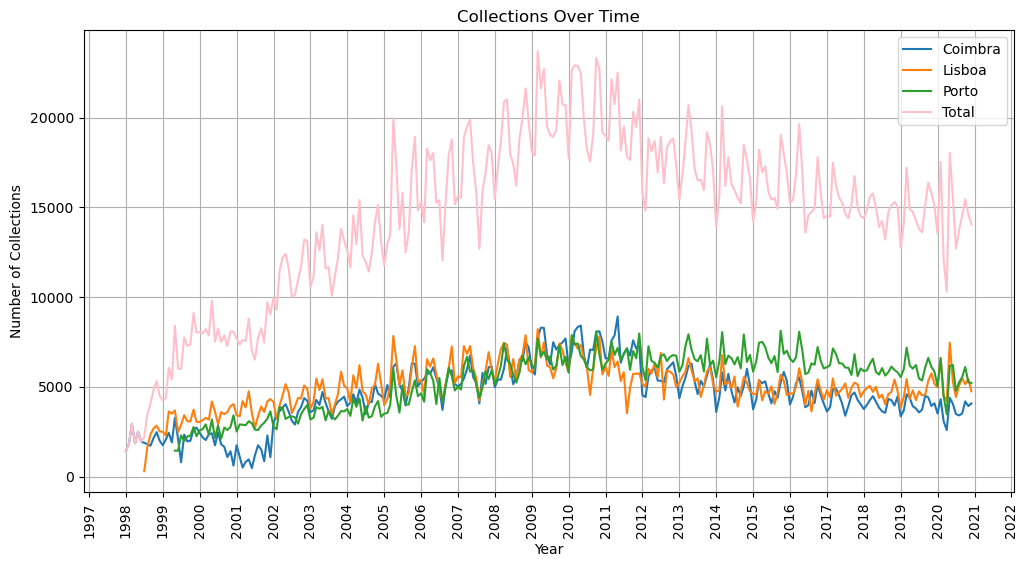

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming your DataFrame is named df
df['colheita_data'] = pd.to_datetime(df['colheita_data'])


total_records = len(df)
print(total_records)

# Count the number of records discarded due to the year filter
year_filter_discarded = df[df['colheita_data'].dt.year < 1998]
#print(year_filter_discarded)

df = df[df['colheita_data'].dt.year >= 1998]

total_records = len(df)
print(total_records)
# Count the number of records discarded due to missing values
missing_values_discarded = df[df['associacao_centro_sangue_transplante'].isna()]
#print(missing_values_discarded)

df = df.dropna(subset=['associacao_centro_sangue_transplante'])


# Create a mapping dictionary for abbreviations
abbreviation_mapping = {'SC': 'Coimbra', 'SP': 'Porto', 'SL': 'Lisboa'}

# Replace abbreviations in the 'associacao_centro_sangue_transplante' column
df['associacao_centro_sangue_transplante'] = df['associacao_centro_sangue_transplante'].replace(abbreviation_mapping)

# Group the data by location and month and count the number of "colheitas" in each month
monthly_colheitas = df.groupby(['associacao_centro_sangue_transplante', df['colheita_data'].dt.to_period('M')]).size()
total_colheitas = df.groupby(df['colheita_data'].dt.to_period('M')).size()

# Get a list of unique locations
unique_locations = df['associacao_centro_sangue_transplante'].unique()

# Create a time series plot with a separate line for each location
plt.figure(figsize=(12, 6))
for location in unique_locations:
    location_data = monthly_colheitas[location]
    plt.plot(location_data.index.to_timestamp(), location_data.values, label=location)

plt.plot(total_colheitas.index.to_timestamp(), total_colheitas.values, label="Total",linestyle='-', color='pink')

plt.title("Collections Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Collections")
plt.legend()
plt.grid(True)

ax = plt.gca()
years = mdates.YearLocator(month=1, day=1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

# Colheitas através do tempo por tipo de sangue

4004223
2747


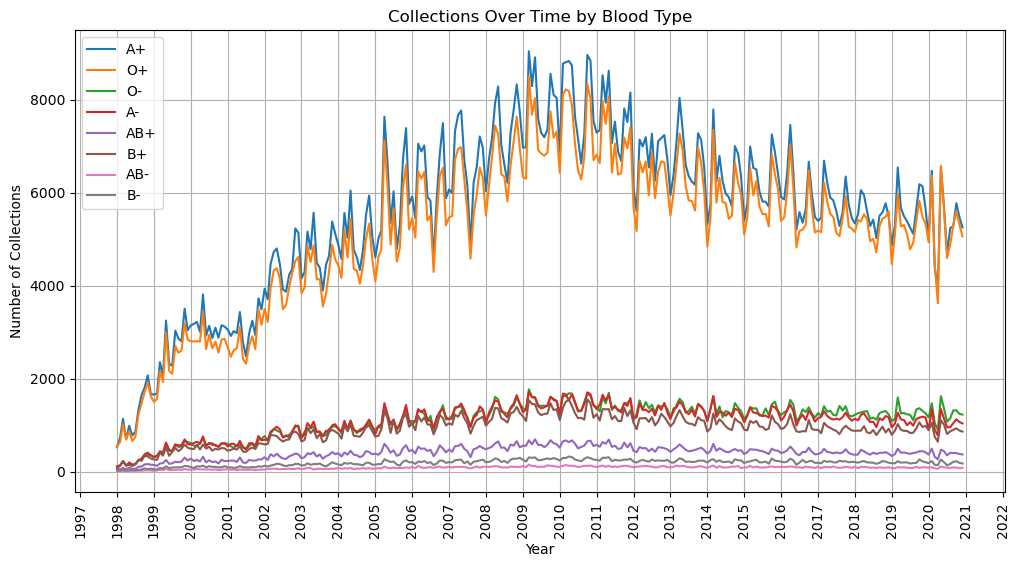

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

valid_blood_combinations = [('A', '+'), ('A', '-'), ('B', '+'), ('B', '-'), ('AB', '+'), ('AB', '-'), ('O', '+'), ('O', '-')]

df['colheita_data'] = pd.to_datetime(df['colheita_data'])
df = df[df['colheita_data'].dt.year >= 1998]

valid = len(df[df.apply(lambda x: (x['dador_tipo_sangue_abo'], x['dador_tipo_sangue_rh']) in valid_blood_combinations, axis=1)])
unvalid = len(df) - valid
print(len(df))
print(unvalid)

df = df[df.apply(lambda x: (x['dador_tipo_sangue_abo'], x['dador_tipo_sangue_rh']) in valid_blood_combinations, axis=1)]

df['Month'] = df['colheita_data'].dt.to_period('M')
monthly_collections = df.groupby(['dador_tipo_sangue_abo', 'dador_tipo_sangue_rh', 'Month']).size().unstack(level=[0, 1], fill_value=0)

plt.figure(figsize=(12, 6))
unique_combinations = df[['dador_tipo_sangue_abo', 'dador_tipo_sangue_rh']].drop_duplicates()
for _, combination in unique_combinations.iterrows():
    combination_data = monthly_collections[combination['dador_tipo_sangue_abo']][combination['dador_tipo_sangue_rh']]
    plt.plot(combination_data.index.to_timestamp(), combination_data.values, linestyle='-', label=f"{combination['dador_tipo_sangue_abo']}{combination['dador_tipo_sangue_rh']}")

plt.title("Collections Over Time by Blood Type")
plt.xlabel("Year")
plt.ylabel("Number of Collections")
plt.legend(loc='upper left')
plt.grid(True)

ax = plt.gca()
years = mdates.YearLocator(month=1, day=1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation=90)

plt.show()


# Colheitas ao longo dos meses nos diferentes anos

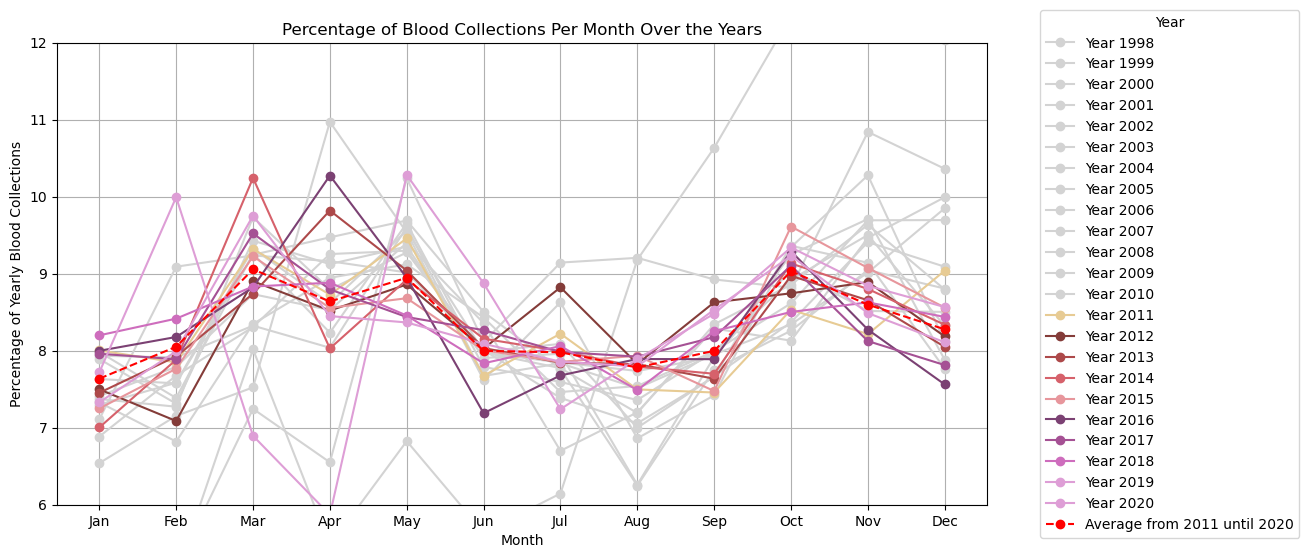

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
import numpy as np

df['colheita_data'] = pd.to_datetime(df['colheita_data'])
df['Year'] = df['colheita_data'].dt.year
df['Month'] = df['colheita_data'].dt.month

df = df[(df['Year'] >= 1998) & (df['Year'] < 2021)]

plt.figure(figsize=(12, 6))
years = df['Year'].unique()

n_colors = len(years)
colors = plt.colormaps["tab20b"](np.linspace(0, 1, n_colors))

years = sorted(years)
months = list(range(1, 13))

average_values = []

for i, year in enumerate(years):
    year_data = df[df['Year'] == year]
    monthly_colheitas = year_data.groupby('Month').size()

    monthly_colheitas = monthly_colheitas.reindex(months, fill_value=0)
    total_year = sum(monthly_colheitas.values)
    monthly_colheitas_percentage = (monthly_colheitas / total_year) * 100

    if 2011 <= year:
        average_values.append(monthly_colheitas.values)
        color = colors[i] 

    else:
        color = 'lightgrey'

    plt.plot(monthly_colheitas_percentage.index, monthly_colheitas_percentage.values, marker='o', linestyle='-', label=f"Year {year}", color=color)

average_values = np.mean(average_values, axis=0)
total_average_years = sum(average_values)
average_values_percentage = (average_values / total_average_years) * 100

plt.plot(months, average_values_percentage, marker='o', linestyle='--', label='Average from 2011 until 2020', color='red')

plt.title("Percentage of Blood Collections Per Month Over the Years")
plt.xlabel("Month")
plt.ylabel("Percentage of Yearly Blood Collections")
plt.grid(True)

plt.ylim(6, 12)
ax = plt.gca()
ax.set_xticks(months)
month_names = [calendar.month_abbr[i] for i in months]
ax.set_xticklabels(month_names)

handles, labels = ax.get_legend_handles_labels()
sorted_handles = [handles[labels.index(f"Year {year}")] for year in years]
sorted_handles.append(handles[labels.index('Average from 2011 until 2020')])
sorted_labels = [f"Year {year}" for year in years]
sorted_labels.append('Average from 2011 until 2020')
ax.legend(sorted_handles, sorted_labels, title="Year", loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.show()


# Simple Exponential Smoothing (1 month)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df['colheita_data'] = pd.to_datetime(df['colheita_data'])

df = df[df['colheita_data'].dt.year >= 1998]

df_monthly = df.set_index('colheita_data').resample('M').count()

Predicted Collections for the month starting on: 2021-01-31 00:00:00
Predicted Collections for Next Month: 15042


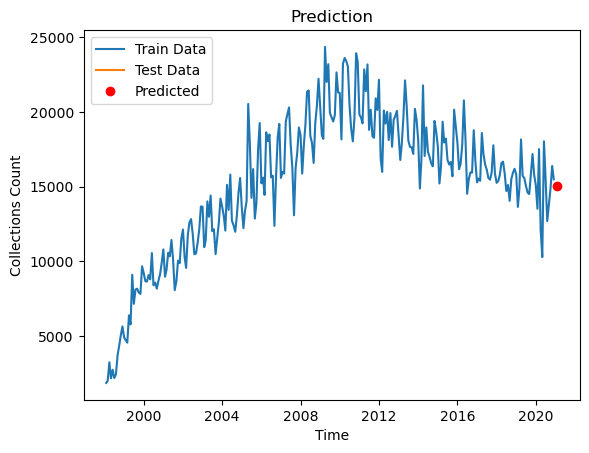

Mean Absolute Error (MAE): 19.856988381947303
Mean Squared Error (MSE): 394.2999876007902
Root Mean Squared Error (RMSE): 19.856988381947303
Mean Absolute Percentage Error (MAPE): 0.13%


In [18]:
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month'] 
train_data = collections_data.iloc[:-1]
test_data = collections_data.iloc[-1:]

model = SimpleExpSmoothing(train_data)
model_fit = model.fit()

predictions = model_fit.forecast(1)

last_month_timestamp = collections_data.index[-1]

next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)

print(f"Predicted Collections for the month starting on: {next_month_timestamp}")
print(f"Predicted Collections for Next Month: {int(np.round(predictions[0]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamp, predictions[0], 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Simple Exponential Smoothing (3 month)

Predicted Collections for the month starting on: 2021-01-31 00:00:00
Predicted Collections for the next 3 Months: 2020-10-31    14593.467816
2020-11-30    14593.467816
2020-12-31    14593.467816
Freq: M, dtype: float64


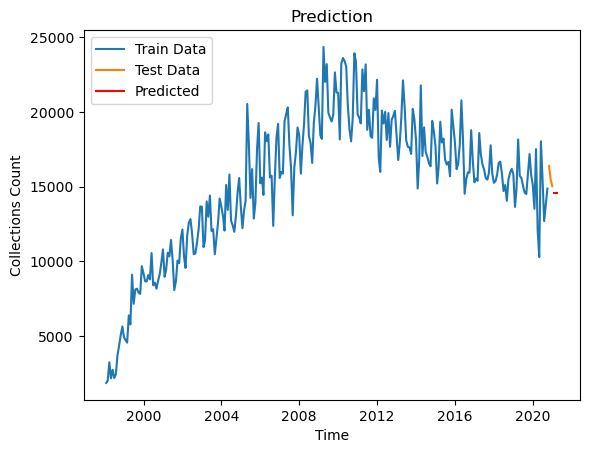

Mean Absolute Error (MAE): 1036.5321844275877
Mean Squared Error (MSE): 1391841.6360208935
Root Mean Squared Error (RMSE): 1179.7633813697107
Mean Absolute Percentage Error (MAPE): 6.51%


In [19]:
collections_data = df_monthly['collections_next_month']
train_data = collections_data.iloc[:-3]
test_data = collections_data.iloc[-3:]

df_monthly.sort_index(inplace=True)

model = SimpleExpSmoothing(train_data)
model_fit = model.fit(remove_bias=True)

predictions = model_fit.forecast(3)

last_month_timestamp = collections_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)
next_3_months_timestamp = last_month_timestamp + pd.DateOffset(months=3)

print(f"Predicted Collections for the month starting on: {next_month_timestamp}")
print(f"Predicted Collections for the next 3 Months: {predictions}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pd.date_range(start=next_month_timestamp, periods=3, freq='M'), predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Simple Exponential Smoothing (6 months)

Predicted Collections for the month starting on: 2021-01-31 00:00:00
Predicted Collections for the next 6 Months:
2020-07-31    15150.140284
2020-08-31    15150.140284
2020-09-30    15150.140284
2020-10-31    15150.140284
2020-11-30    15150.140284
2020-12-31    15150.140284
Freq: M, dtype: float64


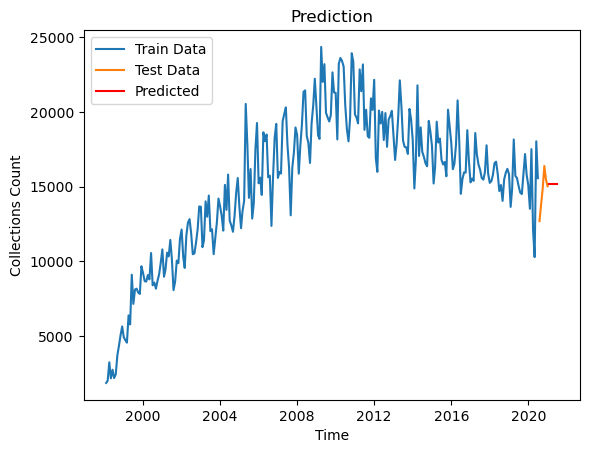

Mean Absolute Error (MAE): 958.3800948056287
Mean Squared Error (MSE): 1581953.587501631
Root Mean Squared Error (RMSE): 1257.757364320174
Mean Absolute Percentage Error (MAPE): 6.88%


In [20]:
collections_data = df_monthly['collections_next_month']
train_data = collections_data.iloc[:-6]
test_data = collections_data.iloc[-6:]

df_monthly.sort_index(inplace=True)

model = SimpleExpSmoothing(train_data)
model_fit = model.fit(remove_bias=True)

predictions = model_fit.forecast(6)

last_month_timestamp = collections_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)
next_6_months_timestamp = last_month_timestamp + pd.DateOffset(months=6)

print(f"Predicted Collections for the month starting on: {next_month_timestamp}")
print(f"Predicted Collections for the next 6 Months:\n{predictions}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pd.date_range(start=next_month_timestamp, periods=6, freq='M'), predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Simple Exponential Smoothing (1 year)

Predicted Collections for the month starting on: 2021-05-30 00:00:00
Predicted Collections for the next 12 Months: 2020-05-31    13785.385867
2020-06-30    13785.385867
2020-07-31    13785.385867
2020-08-31    13785.385867
2020-09-30    13785.385867
2020-10-31    13785.385867
2020-11-30    13785.385867
2020-12-31    13785.385867
2021-01-31    13785.385867
2021-02-28    13785.385867
2021-03-31    13785.385867
2021-04-30    13785.385867
Freq: M, dtype: float64


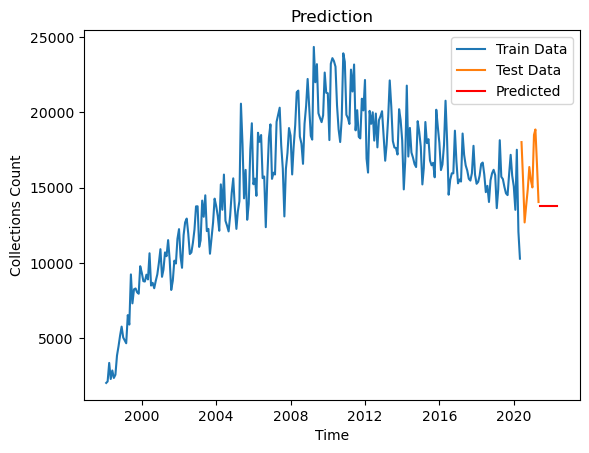

Mean Absolute Error (MAE): 2219.4284440848496
Mean Squared Error (MSE): 7549893.821089618
Root Mean Squared Error (RMSE): 2747.7070115078895
Mean Absolute Percentage Error (MAPE): 13.12%


In [5]:
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']
train_data = collections_data.iloc[:-12]
test_data = collections_data.iloc[-12:]

df_monthly.sort_index(inplace=True)

model = SimpleExpSmoothing(train_data)
model_fit = model.fit(remove_bias=True)

predictions = model_fit.forecast(12)

last_month_timestamp = collections_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)
next_3_months_timestamp = last_month_timestamp + pd.DateOffset(months=12)

print(f"Predicted Collections for the month starting on: {next_month_timestamp}")
print(f"Predicted Collections for the next 12 Months: {predictions}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(pd.date_range(start=next_month_timestamp, periods=12, freq='M'), predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Holt Winter's Exponential Smoothing (1 month)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df['colheita_data'] = pd.to_datetime(df['colheita_data'])

df = df[df['colheita_data'].dt.year >= 1998]

df_monthly = df.set_index('colheita_data').resample('M').count()

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the month starting on: 2021-01-31 00:00:00
Predicted Collections for Next Month: 14357


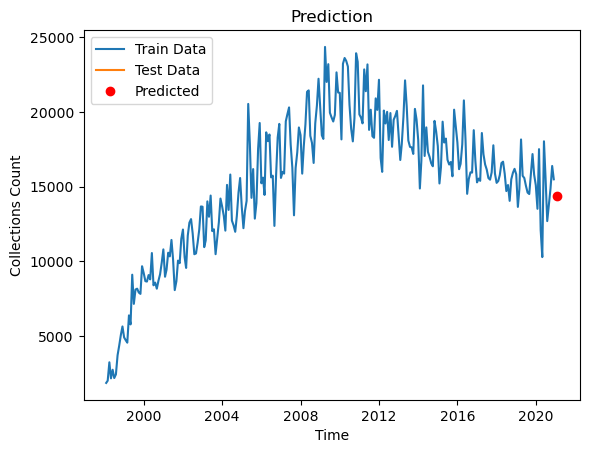

Mean Absolute Error (MAE): 664.6357864354541
Mean Squared Error (MSE): 441740.7286106745
Root Mean Squared Error (RMSE): 664.6357864354541
Mean Absolute Percentage Error (MAPE): 4.42%


In [23]:
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']

train_data = collections_data.iloc[:-1]
test_data = collections_data.iloc[-1:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=1)

last_month_timestamp = collections_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)

print(f"Predicted Collections for the month starting on: {next_month_timestamp}")
print(f"Predicted Collections for Next Month: {int(np.round(predictions[0]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamp, predictions[0], 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Holt Winter's Exponential Smoothing (3 months)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the next 3 Months:
2021-01-31 00:00:00: 15887
2021-02-28 00:00:00: 14912
2021-03-31 00:00:00: 14158


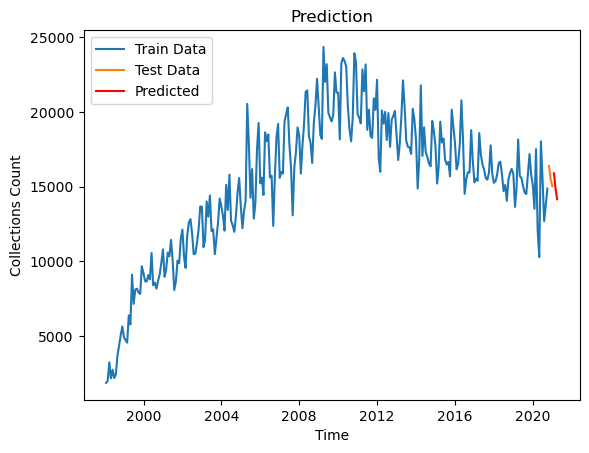

Mean Absolute Error (MAE): 644.2523092230361
Mean Squared Error (MSE): 440423.58016166306
Root Mean Squared Error (RMSE): 663.6441668256138
Mean Absolute Percentage Error (MAPE): 4.16%


In [25]:
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']


train_data = collections_data.iloc[:-3]
test_data = collections_data.iloc[-3:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=3)

last_month_timestamp = collections_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 4)]

print("Predicted Collections for the next 3 Months:")
for i in range(3):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Holt Winter's Exponential Smoothing (6 months)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the next 6 Months:
2021-01-31 00:00:00: 13909
2021-02-28 00:00:00: 13503
2021-03-31 00:00:00: 14206
2021-04-30 00:00:00: 15887
2021-05-31 00:00:00: 14911
2021-06-30 00:00:00: 14152


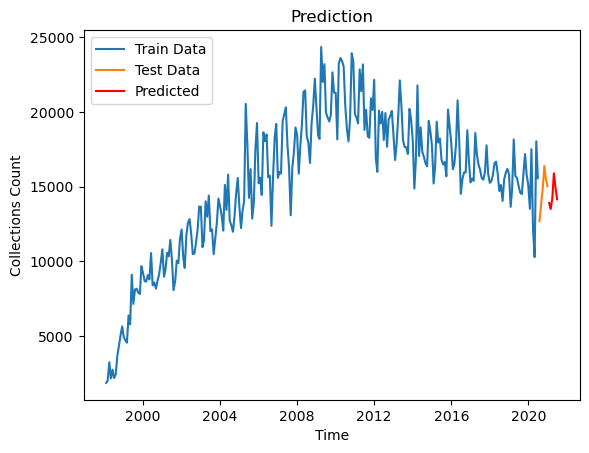

Mean Absolute Error (MAE): 691.3871265848726
Mean Squared Error (MSE): 559656.9098697574
Root Mean Squared Error (RMSE): 748.1022054971883
Mean Absolute Percentage Error (MAPE): 4.82%


In [26]:
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']

train_data = collections_data.iloc[:-6]
test_data = collections_data.iloc[-6:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=6)

last_month_timestamp = collections_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 7)]

print("Predicted Collections for the next 6 Months:")
for i in range(6):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Holt Winter's Exponential Smoothing (1 year)

Predicted Collections for the next 12 Months:
2021-01-31 00:00:00: 13900
2021-02-28 00:00:00: 14554
2021-03-31 00:00:00: 17125
2021-04-30 00:00:00: 16324
2021-05-31 00:00:00: 16024
2021-06-30 00:00:00: 14708
2021-07-31 00:00:00: 14683
2021-08-31 00:00:00: 14260
2021-09-30 00:00:00: 14938
2021-10-31 00:00:00: 16743
2021-11-30 00:00:00: 15853
2021-12-31 00:00:00: 15178


c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


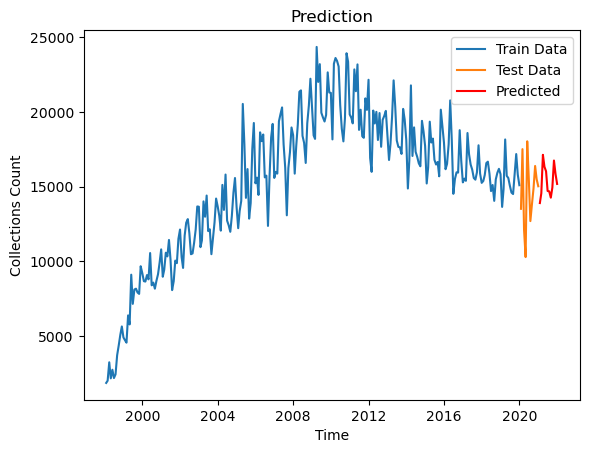

Mean Absolute Error (MAE): 1719.9998634965211
Mean Squared Error (MSE): 6655972.725363411
Root Mean Squared Error (RMSE): 2579.9171935090108
Mean Absolute Percentage Error (MAPE): 13.46%


In [27]:
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']

train_data = collections_data.iloc[:-12]
test_data = collections_data.iloc[-12:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=12)

last_month_timestamp = collections_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 13)]

print("Predicted Collections for the next 12 Months:")
for i in range(12):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Holt Winter's Exponential Smoothing (2 year)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predicted Collections for the next 24 Months:
2021-01-31 00:00:00: 13935
2021-02-28 00:00:00: 14331
2021-03-31 00:00:00: 16590
2021-04-30 00:00:00: 16369
2021-05-31 00:00:00: 15836
2021-06-30 00:00:00: 14244
2021-07-31 00:00:00: 14367
2021-08-31 00:00:00: 13838
2021-09-30 00:00:00: 14315
2021-10-31 00:00:00: 16276
2021-11-30 00:00:00: 15504
2021-12-31 00:00:00: 14440
2022-01-31 00:00:00: 13349
2022-02-28 00:00:00: 13746
2022-03-31 00:00:00: 16005
2022-04-30 00:00:00: 15783
2022-05-31 00:00:00: 15251
2022-06-30 00:00:00: 13659
2022-07-31 00:00:00: 13781
2022-08-31 00:00:00: 13253
2022-09-30 00:00:00: 13730
2022-10-31 00:00:00: 15691
2022-11-30 00:00:00: 14919
2022-12-31 00:00:00: 13854


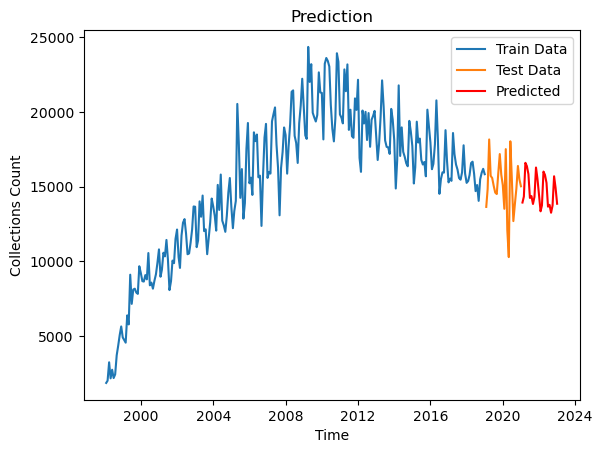

Mean Absolute Error (MAE): 1318.1507763359098
Mean Squared Error (MSE): 3508221.3179182727
Root Mean Squared Error (RMSE): 1873.0246442367684
Mean Absolute Percentage Error (MAPE): 9.38%


In [28]:
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']

train_data = collections_data.iloc[:-24]
test_data = collections_data.iloc[-24:]

model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=24)

last_month_timestamp = collections_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 25)]

print("Predicted Collections for the next 24 Months:")
for i in range(24):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Moving Average (1 month)

Predicted Collections for the month starting on: 2021-01-31 00:00:00
Predicted Collections for Next Month: 15488


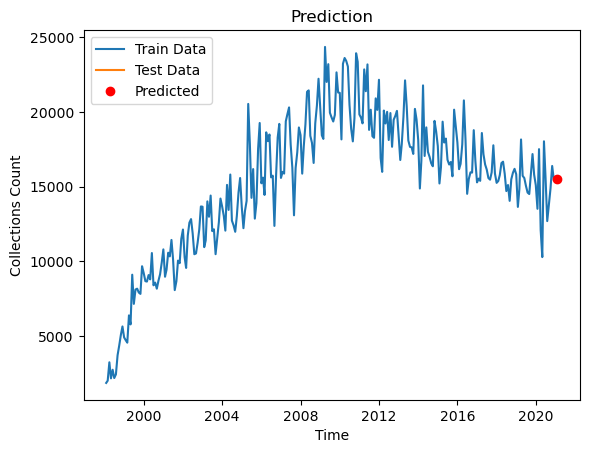

Mean Absolute Error (MAE): 466.0
Mean Squared Error (MSE): 217156.0
Root Mean Squared Error (RMSE): 466.0
Mean Absolute Percentage Error (MAPE): 3.10%


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['colheita_data'] = pd.to_datetime(df['colheita_data'])

df_monthly = df.set_index('colheita_data').resample('M').count()
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']

train_data = collections_data.iloc[:-1]
test_data = collections_data.iloc[-1:]

moving_average_order = 1

moving_avg_predictions = train_data.rolling(window=moving_average_order).mean()

last_available_avg = moving_avg_predictions.iloc[-1]
predictions = [last_available_avg]

last_month_timestamp = collections_data.index[-1]
next_month_timestamp = last_month_timestamp + pd.DateOffset(months=1)

print(f"Predicted Collections for the month starting on: {next_month_timestamp}")
print(f"Predicted Collections for Next Month: {int(np.round(predictions[0]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamp, predictions[0], 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Moving Average (3 months)

Predicted Collections for the next 3 Months:
2021-01-31 00:00:00: 13799
2021-02-28 00:00:00: 13799
2021-03-31 00:00:00: 13799


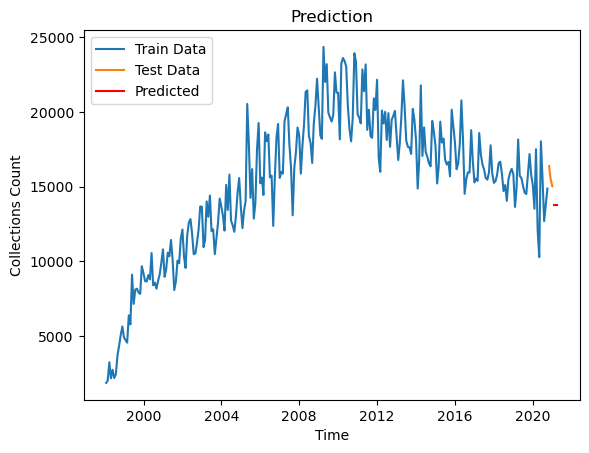

Mean Absolute Error (MAE): 1831.333333333334
Mean Squared Error (MSE): 3671224.4444444464
Root Mean Squared Error (RMSE): 1916.0439568142601
Mean Absolute Percentage Error (MAPE): 11.60%


In [30]:
train_data = collections_data.iloc[:-3]
test_data = collections_data.iloc[-3:]

moving_average_order = 3

moving_avg_predictions = train_data.rolling(window=moving_average_order).mean()

last_available_avg = moving_avg_predictions.iloc[-1]
predictions = [last_available_avg] * 3

last_month_timestamp = collections_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 4)]

print("Predicted Collections for the next 3 Months:")
for i in range(3):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Moving Average (6 months)

Predicted Collections for the next 6 Months:
2021-01-31 00:00:00: 14498
2021-02-28 00:00:00: 14498
2021-03-31 00:00:00: 14498
2021-04-30 00:00:00: 14498
2021-05-31 00:00:00: 14498
2021-06-30 00:00:00: 14498


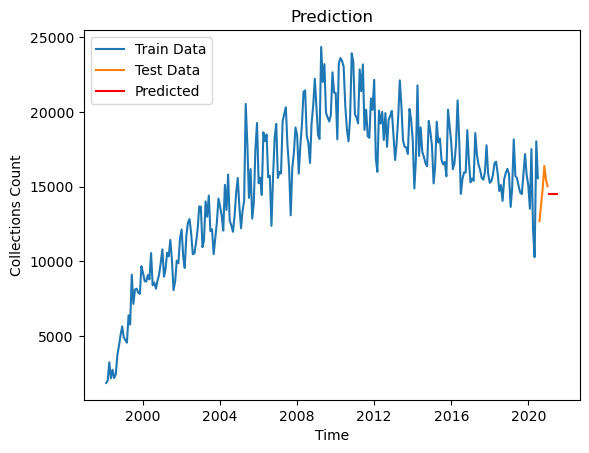

Mean Absolute Error (MAE): 1039.722222222222
Mean Squared Error (MSE): 1438898.1388888888
Root Mean Squared Error (RMSE): 1199.5408033447168
Mean Absolute Percentage Error (MAPE): 7.15%


In [31]:
train_data = collections_data.iloc[:-6]
test_data = collections_data.iloc[-6:]

moving_average_order = 6

moving_avg_predictions = train_data.rolling(window=moving_average_order).mean()

last_available_avg = moving_avg_predictions.iloc[-1]
predictions = [last_available_avg] * 6

last_month_timestamp = collections_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 7)]

print("Predicted Collections for the next 6 Months:")
for i in range(6):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# Moving Average (1 year)

Predicted Collections for the next 12 Months:
2021-01-31 00:00:00: 15501
2021-02-28 00:00:00: 15501
2021-03-31 00:00:00: 15501
2021-04-30 00:00:00: 15501
2021-05-31 00:00:00: 15501
2021-06-30 00:00:00: 15501
2021-07-31 00:00:00: 15501
2021-08-31 00:00:00: 15501
2021-09-30 00:00:00: 15501
2021-10-31 00:00:00: 15501
2021-11-30 00:00:00: 15501
2021-12-31 00:00:00: 15501


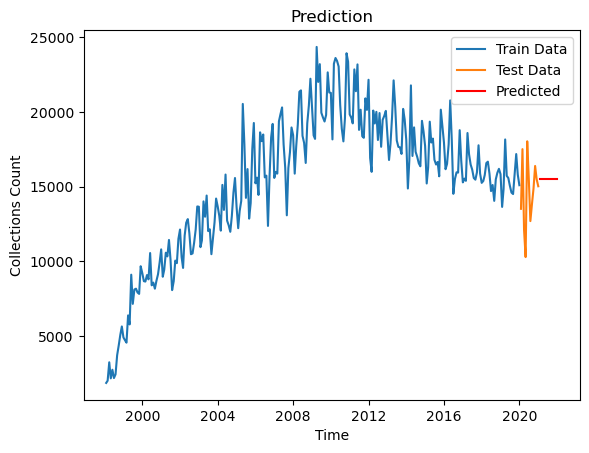

Mean Absolute Error (MAE): 1807.3611111111113
Mean Squared Error (MSE): 5438983.472222223
Root Mean Squared Error (RMSE): 2332.1628314125546
Mean Absolute Percentage Error (MAPE): 13.88%


In [32]:
train_data = collections_data.iloc[:-12]
test_data = collections_data.iloc[-12:]

moving_average_order = 12

moving_avg_predictions = train_data.rolling(window=moving_average_order).mean()

last_available_avg = moving_avg_predictions.iloc[-1]
predictions = [last_available_avg] * 12

last_month_timestamp = collections_data.index[-1]
next_month_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, 13)]

print("Predicted Collections for the next 12 Months:")
for i in range(12):
    print(f"{next_month_timestamps[i]}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_month_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('Prediction')
plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# ARIMA (1 month)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  275
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2376.493
Date:                Thu, 30 Nov 2023   AIC                           4764.986
Time:                        12:44:54   BIC                           4786.665
Sample:                    01-31-1998   HQIC                          4773.687
                         - 11-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9978      0.007    136.790      0.000       0.984       1.012
ar.L2         -0.9937      0.008   -120.818      0.000      -1.010      -0.978
ma.L1         -1.6929      0.052    -32.599      0.0

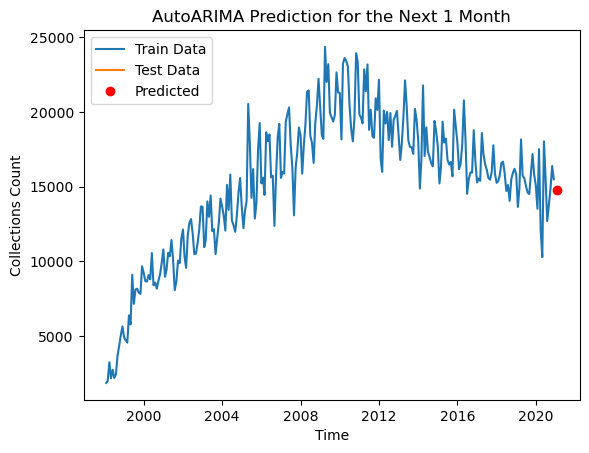

Mean Absolute Error (MAE): 237.31754671624185
Mean Squared Error (MSE): 56319.617979415634
Root Mean Squared Error (RMSE): 237.31754671624185
Mean Absolute Percentage Error (MAPE): 1.58%


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['colheita_data'] = pd.to_datetime(df['colheita_data'])

df_monthly = df.set_index('colheita_data').resample('M').count()
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']
train_data = collections_data.iloc[:-1]
test_data = collections_data.iloc[-1:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=1, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 1
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Collections for the next 1 month:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('AutoARIMA Prediction for the Next 1 Month')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# ARIMA (3 month)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  273
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2359.709
Date:                Thu, 30 Nov 2023   AIC                           4731.419
Time:                        12:47:15   BIC                           4753.054
Sample:                    01-31-1998   HQIC                          4740.105
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.006    154.474      0.000       0.986       1.012
ar.L2         -0.9959      0.007   -142.983      0.000      -1.010      -0.982
ma.L1         -1.6930      0.051    -32.891      0.0

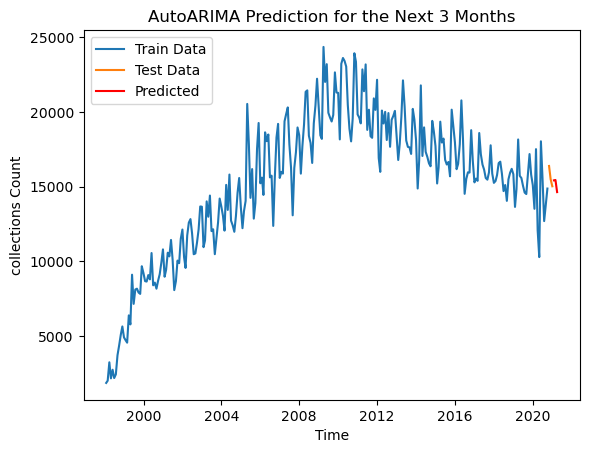

Mean Absolute Error (MAE): 465.0189178185513
Mean Squared Error (MSE): 358574.2272267314
Root Mean Squared Error (RMSE): 598.8106772818362
Mean Absolute Percentage Error (MAPE): 2.92%


In [34]:
df_monthly['collections_next_3_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_3_month']
train_data = collections_data.iloc[:-3]
test_data = collections_data.iloc[-3:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=3, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 3
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted collections for the next 3 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('collections Count')
plt.title('AutoARIMA Prediction for the Next 3 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# ARIMA (6 months)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (6) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  270
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -2363.837
Date:                Thu, 30 Nov 2023   AIC                           4739.674
Time:                        12:47:37   BIC                           4761.242
Sample:                    01-31-1998   HQIC                          4748.336
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     69.3101     34.080      2.034      0.042       2.515     136.105
ar.L1          0.1042      0.073      1.424      0.155      -0.039       0.248
ar.L2         -0.1798      0.053     -3.379      0.0

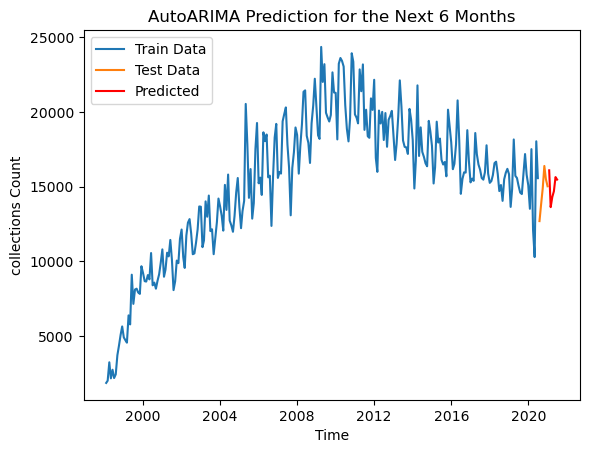

Mean Absolute Error (MAE): 1074.2207304555977
Mean Squared Error (MSE): 2492781.7155049453
Root Mean Squared Error (RMSE): 1578.8545580594007
Mean Absolute Percentage Error (MAPE): 7.71%


In [35]:
df_monthly['collections_next_6_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_6_month']
train_data = collections_data.iloc[:-6]
test_data = collections_data.iloc[-6:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=6, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 6
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted collections for the next 6 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('collections Count')
plt.title('AutoARIMA Prediction for the Next 6 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# ARIMA (1 year)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -2263.376
Date:                Thu, 30 Nov 2023   AIC                           4540.752
Time:                        12:47:53   BIC                           4565.758
Sample:                    01-31-1998   HQIC                          4550.801
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8342      0.116      7.162      0.000       0.606       1.063
ar.L2         -0.8382      0.116     -7.252      0.000      -1.065      -0.612
ar.L3         -0.1563      0.116     -1.350      0.1

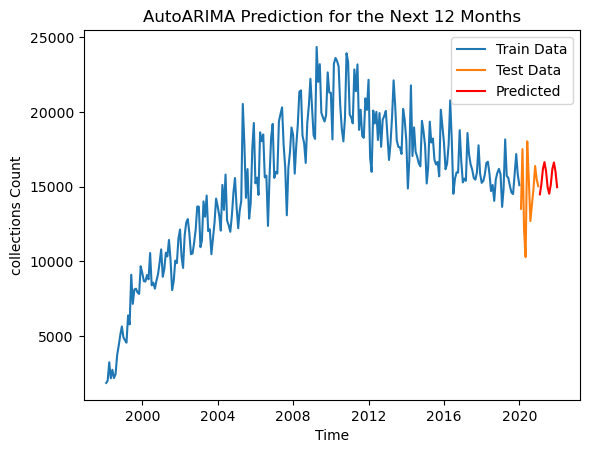

Mean Absolute Error (MAE): 1804.6092443987882
Mean Squared Error (MSE): 6264549.527544676
Root Mean Squared Error (RMSE): 2502.9082139672396
Mean Absolute Percentage Error (MAPE): 14.10%


In [36]:
df_monthly['collections_next_12_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_12_month']
train_data = collections_data.iloc[:-12]
test_data = collections_data.iloc[-12:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=12, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 12
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted collections for the next 12 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('collections Count')
plt.title('AutoARIMA Prediction for the Next 12 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# ARIMA (2 year)

c:\Users\gonca\anaconda3\envs\IST_DL21_Env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (24) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -2163.071
Date:                Thu, 30 Nov 2023   AIC                           4340.141
Time:                        12:48:04   BIC                           4364.819
Sample:                    01-31-1998   HQIC                          4350.072
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8312      0.123      6.748      0.000       0.590       1.073
ar.L2         -0.8336      0.122     -6.827      0.000      -1.073      -0.594
ar.L3         -0.1604      0.122     -1.317      0.1

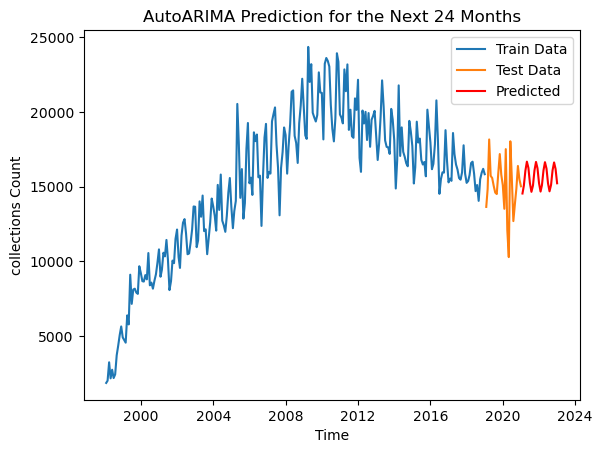

Mean Absolute Error (MAE): 1192.4801794921034
Mean Squared Error (MSE): 3412973.8583223955
Root Mean Squared Error (RMSE): 1847.4235730666628
Mean Absolute Percentage Error (MAPE): 8.88%


In [37]:
df_monthly['collections_next_24_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_24_month']
train_data = collections_data.iloc[:-24]
test_data = collections_data.iloc[-24:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=24, seasonal=False, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 24
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted collections for the next 24 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('collections Count')
plt.title('AutoARIMA Prediction for the Next 24 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# SARIMA (1 month)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  275
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -2376.493
Date:                Thu, 30 Nov 2023   AIC                           4764.986
Time:                        12:49:28   BIC                           4786.665
Sample:                    01-31-1998   HQIC                          4773.687
                         - 11-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9978      0.007    136.790      0.000       0.984       1.012
ar.L2         -0.9937      0.008   -120.818      0.000      -1.010      -0.978
ma.L1         -1.6929      0.052    -32.599      0.0

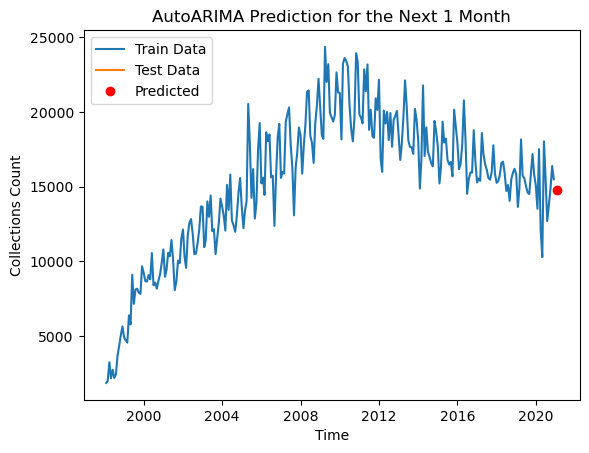

Mean Absolute Error (MAE): 237.31754671624185
Mean Squared Error (MSE): 56319.617979415634
Root Mean Squared Error (RMSE): 237.31754671624185
Mean Absolute Percentage Error (MAPE): 1.58%


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

df['colheita_data'] = pd.to_datetime(df['colheita_data'])

df_monthly = df.set_index('colheita_data').resample('M').count()
df_monthly['collections_next_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_month']
train_data = collections_data.iloc[:-1]
test_data = collections_data.iloc[-1:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=1, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 1
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Collections for the next 1 month:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'ro', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('AutoARIMA Prediction for the Next 1 Month')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# SARIMA (3 months)

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  273
Model:             SARIMAX(0, 1, 1)x(2, 0, 1, 3)   Log Likelihood               -2356.492
Date:                           Thu, 30 Nov 2023   AIC                           4724.983
Time:                                   12:49:57   BIC                           4746.618
Sample:                               01-31-1998   HQIC                          4733.669
                                    - 09-30-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     97.9823     47.261      2.073      0.038       5.352     190.613
ma.L1         -0.7175      0.038    -18.938

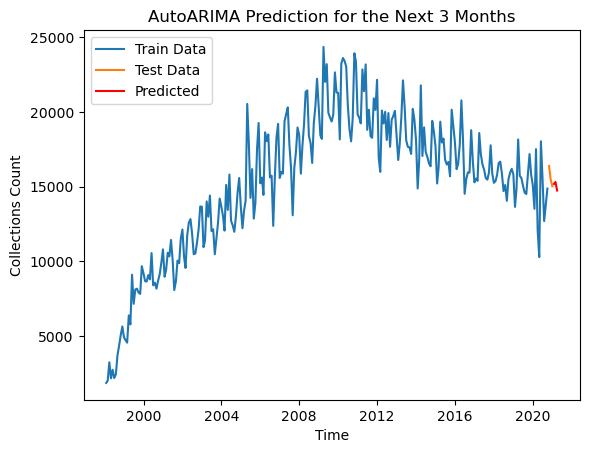

Mean Absolute Error (MAE): 554.1947354593461
Mean Squared Error (MSE): 517200.76288900356
Root Mean Squared Error (RMSE): 719.1667142526853
Mean Absolute Percentage Error (MAPE): 3.46%


In [39]:
df_monthly['collections_next_3_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_3_month']
train_data = collections_data.iloc[:-3]
test_data = collections_data.iloc[-3:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=3, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 3
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Collections for the next 3 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('AutoARIMA Prediction for the Next 3 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# SARIMA (6 months)

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  270
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 6)   Log Likelihood               -2310.518
Date:                                Thu, 30 Nov 2023   AIC                           4633.035
Time:                                        12:50:26   BIC                           4654.603
Sample:                                    01-31-1998   HQIC                          4641.697
                                         - 06-30-2020                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7841      0.033    -23.906      0.000      -0.848      -0.720
ar.

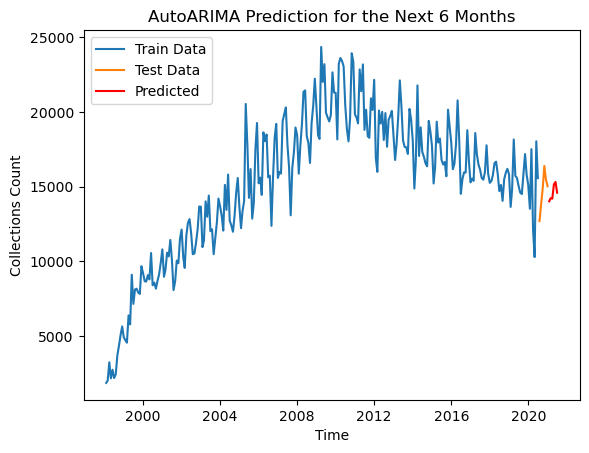

Mean Absolute Error (MAE): 705.8675731597945
Mean Squared Error (MSE): 683757.7184485715
Root Mean Squared Error (RMSE): 826.8964375594876
Mean Absolute Percentage Error (MAPE): 4.89%


In [40]:
df_monthly['collections_next_6_month'] = df_monthly['dador_nr']

collections_data = df_monthly['collections_next_6_month']
train_data = collections_data.iloc[:-6]
test_data = collections_data.iloc[-6:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=6, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 6
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted Collections for the next 6 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Collections Count')
plt.title('AutoARIMA Prediction for the Next 6 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# SARIMA (1 year)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  264
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2237.551
Date:                            Thu, 30 Nov 2023   AIC                           4483.102
Time:                                    12:52:02   BIC                           4497.391
Sample:                                01-31-1998   HQIC                          4488.844
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7411      0.043    -17.286      0.000      -0.825      -0.657
ar.S.L12       0.9456      0.026   

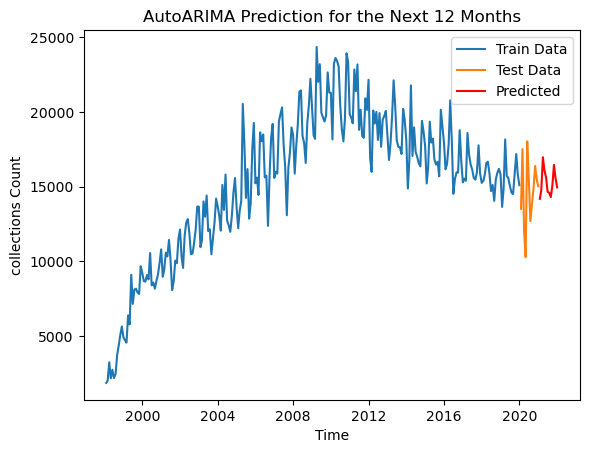

Mean Absolute Error (MAE): 1677.8521638322816
Mean Squared Error (MSE): 6290080.787018269
Root Mean Squared Error (RMSE): 2508.0033466919995
Mean Absolute Percentage Error (MAPE): 13.10%


In [41]:
df_monthly['collections_next_12_month'] = df_monthly['dador_nr']
collections_data = df_monthly['collections_next_12_month']
train_data = collections_data.iloc[:-12]
test_data = collections_data.iloc[-12:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=12, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 12
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted collections for the next 12 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('collections Count')
plt.title('AutoARIMA Prediction for the Next 12 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# SARIMA (2 years)

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  252
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -2139.315
Date:                            Thu, 30 Nov 2023   AIC                           4286.630
Time:                                    12:55:40   BIC                           4300.732
Sample:                                01-31-1998   HQIC                          4292.305
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7395      0.045    -16.531      0.000      -0.827      -0.652
ar.S.L12       0.9420      0.028   

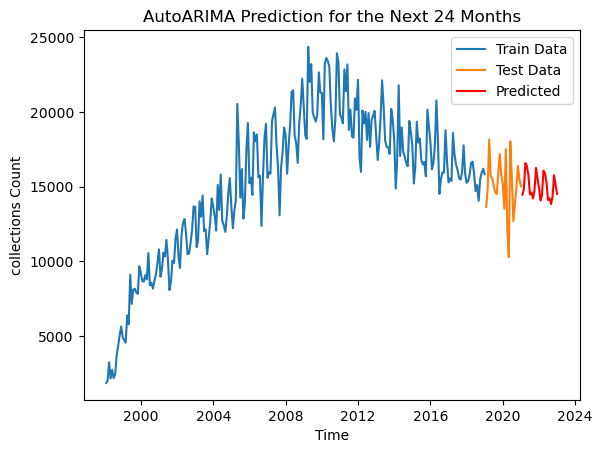

Mean Absolute Error (MAE): 1149.8443215938462
Mean Squared Error (MSE): 3181864.777526433
Root Mean Squared Error (RMSE): 1783.778231038386
Mean Absolute Percentage Error (MAPE): 8.34%


In [42]:
df_monthly['collections_next_24_month'] = df_monthly['dador_nr']
collections_data = df_monthly['collections_next_24_month']
train_data = collections_data.iloc[:-24]
test_data = collections_data.iloc[-24:]

stepwise_fit = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3, m=12, seasonal=True, suppress_warnings=True)

print(stepwise_fit.summary())

forecast_steps = 24
predictions = stepwise_fit.predict(n_periods=forecast_steps)

last_month_timestamp = collections_data.index[-1]
next_months_timestamps = [last_month_timestamp + pd.DateOffset(months=i) for i in range(1, forecast_steps + 1)]

print("Predicted collections for the next 24 months:")
for i, timestamp in enumerate(next_months_timestamps):
    print(f"{timestamp}: {int(np.round(predictions[i]))}")

plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(next_months_timestamps, predictions, 'r', label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('collections Count')
plt.title('AutoARIMA Prediction for the Next 24 Months')

plt.show()

mae = mean_absolute_error(test_data, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")